In [3]:
import gdsfactory as gf
def PD_generate(Name,Taper_length, Taper_Sw, Taper_Ew, Cavity_length, Si_width, Ge_width, Si_layer=(1, 0), Ge_layer=(2, 0), P_layer=(3,0), N_layer=(4,0)):
    c = gf.Component(Name)
    # general geometry 
    c.add_polygon([(Taper_length, -Si_width/2), (Taper_length, Si_width/2), (Taper_length+Cavity_length, Si_width/2), (Taper_length+Cavity_length, -Si_width/2)], layer=Si_layer) # silicon cavity
    c.add_polygon([(Taper_length, -Ge_width/2), (Taper_length, Ge_width/2), (Taper_length+Cavity_length, Ge_width/2), (Taper_length+Cavity_length, -Ge_width/2)], layer=Ge_layer)# Ge cavity
    c.add_polygon([(0, -Taper_Sw/2), (0, Taper_Sw/2), (Taper_length, Taper_Ew/2), (Taper_length, -Taper_Ew/2)], layer=Si_layer)
    c.add_port(name="In", center=[0, 0.35/2], width=Taper_Sw, orientation=180, layer=(100,0))
 
   # Doping section
    
    return c





In [3]:

PD_DOE1 = PD_generate("PD1",15, 0.5, 0.8, 15, 6, 0.8)
PD_DOE1.write_gds("PD1_component.gds")  # 

WindowsPath('PD1_component.gds')

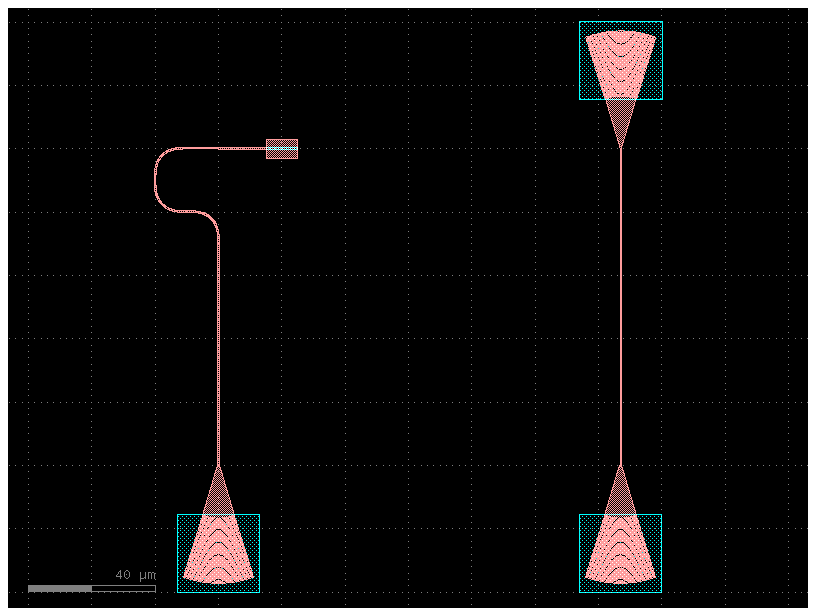

In [13]:
PD1 = gf.import_gds("PD1_component.gds")
#PD1.pprint_ports()

TOP_layout = gf.Component()

pt =  TOP_layout << PD1
#pt.drotate(90)
pt.dmove([0, 100])
Single_grating = gf.components.grating_coupler_elliptical(polarization='te', taper_length=16.6, taper_angle=40, wavelength=1.554, fiber_angle=15, grating_line_width=0.343, neff=2.638, nclad=1.443, n_periods=30, big_last_tooth=False, layer_slab='SLAB150', slab_xmin=-1, slab_offset=2, spiked=True, cross_section='strip')
pt2 = TOP_layout << Single_grating
pt2.drotate(-90)
#Single_grating.pprint_ports()
route = gf.routing.route_single(TOP_layout, port1=pt.ports["In"], port2=pt2.ports["o1"],)

pt3 = TOP_layout << Single_grating
pt3.dmove([0,127])
pt3.drotate(-90)

pt4 = TOP_layout << Single_grating
pt4.dmove([100,-127])
pt4.drotate(90)
route = gf.routing.route_single(TOP_layout, port1=pt3.ports["o1"], port2=pt4.ports["o1"],)

TOP_layout.plot()

In [4]:
Cavity_length = [10,15,20]
base_name = "PD"
for i in range(1, 4):
    PD_DOE = PD_generate(base_name + str(i),15, 0.5, 0.8, Cavity_length[i-1], 6, 0.8)
    file_name = f"{base_name}{i}_component.gds"
    PD_DOE.write_gds(file_name)  # 

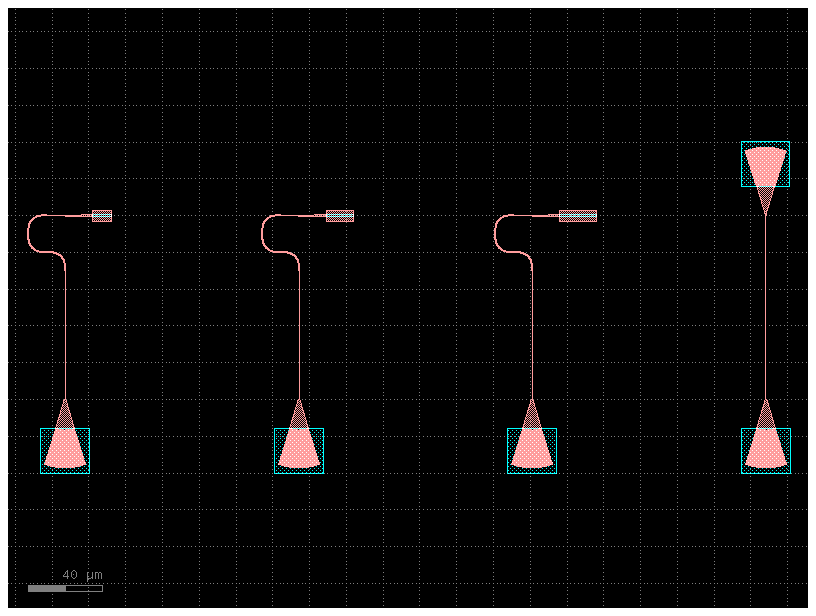

In [15]:
TOP_layout = gf.Component()

for i in range(1, 4):
    file_name = f"{base_name}{i}_component.gds"
    Imported_layout = gf.import_gds(file_name)
    
    pt =  TOP_layout << Imported_layout
    #pt.drotate(90)
    pt.dmove([i*127, 100])

    Single_grating = gf.components.grating_coupler_elliptical(polarization='te', taper_length=16.6, taper_angle=40, wavelength=1.554, fiber_angle=15, grating_line_width=0.343, neff=2.638, nclad=1.443, n_periods=30, big_last_tooth=False, layer_slab='SLAB150', slab_xmin=-1, slab_offset=2, spiked=True, cross_section='strip')
    pt2 = TOP_layout << Single_grating
    pt2.drotate(-90)
    pt2.dmove([i*127, 0])

    route = gf.routing.route_single(TOP_layout, port1=pt.ports["In"], port2=pt2.ports["o1"],)


pt3 = TOP_layout << Single_grating
pt3.dmove([0,4*127])
pt3.drotate(-90)

pt4 = TOP_layout << Single_grating
pt4.dmove([100,4*-127])
pt4.drotate(90)
route = gf.routing.route_single(TOP_layout, port1=pt3.ports["o1"], port2=pt4.ports["o1"],)

TOP_layout.plot()